<img src="../input/head.png" alt="header">

In [1]:
# essentials
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
from matplotlib import pyplot as plt
%matplotlib inline
rs=17

#### Data import

In [2]:
# # cam omit this segment when using directly inside kaggle environment
# !kaggle competitions download -c playground-series-s3e13 -p "../input" -q

# import zipfile
# with zipfile.ZipFile("../input/playground-series-s3e13.zip", 'r') as data:
#     data.printdir()
#     data.extractall("../input/playground-series-s3e13")

In [3]:
# data
train = pd.read_csv("../input/playground-series-s3e13/train.csv")
test = pd.read_csv("../input/playground-series-s3e13/test.csv")
sample_submission = pd.read_csv("../input/playground-series-s3e13/sample_submission.csv")

#### Getting started

In [4]:
print(f'Training data: {train.shape}, Testing data: {test.shape}')
print(f'Test fraction: {test.shape[0]*100/(train.shape[0]+test.shape[0])}%')

Training data: (707, 66), Testing data: (303, 65)
Test fraction: 30.0%


In [5]:
train.head(3)

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease


In [6]:
test.head(3)

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,708,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,709,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [7]:
train.describe()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,353.000000,0.503536,0.449788,0.459689,0.487977,0.517680,0.449788,0.441301,0.487977,0.390382,0.393211,0.381895,0.373409,0.360679,0.339463,0.379066,0.394625,0.359264,0.377652,0.322489,0.323904,0.335219,0.332390,0.367751,0.411598,0.390382,0.380481,0.336634,0.353607,0.398868,0.360679,0.308345,0.376238,0.448373,0.449788,0.404526,0.451202,0.480905,0.482320,0.438472,0.374823,0.272984,0.214993,0.240453,0.226308,0.223479,0.253182,0.219236,0.227723,0.213579,0.131542,0.195191,0.176803,0.202263,0.171146,0.148515,0.072136,0.097595,0.079208,0.084866,0.154173,0.144272,0.137199,0.032532,0.031117
std,204.237607,0.500341,0.497825,0.498725,0.500209,0.500041,0.497825,0.496894,0.500209,0.488181,0.488809,0.486195,0.484052,0.480537,0.473862,0.485498,0.489116,0.480125,0.485143,0.467760,0.468295,0.472401,0.471404,0.482535,0.492472,0.488181,0.485849,0.472893,0.478427,0.490012,0.480537,0.462137,0.484784,0.497680,0.497825,0.491148,0.497965,0.499989,0.500041,0.496551,0.484420,0.445808,0.411108,0.427661,0.418737,0.416872,0.435142,0.414022,0.419660,0.410123,0.338231,0.396628,0.381772,0.401972,0.376903,0.355861,0.258896,0.296977,0.270254,0.278879,0.361370,0.351614,0.344301,0.177533,0.173758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,353.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [8]:
test.describe()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.00000,303.000000,303.000000,303.000000,303.000000,303.00000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,858.000000,0.577558,0.462046,0.458746,0.504950,0.531353,0.541254,0.488449,0.448845,0.458746,0.415842,0.366337,0.415842,0.396040,0.339934,0.369637,0.422442,0.313531,0.379538,0.293729,0.386139,0.336634,0.30033,0.399340,0.455446,0.382838,0.386139,0.30033,0.353135,0.356436,0.363036,0.323432,0.353135,0.445545,0.478548,0.445545,0.471947,0.475248,0.501650,0.448845,0.389439,0.313531,0.217822,0.227723,0.214521,0.234323,0.227723,0.231023,0.224422,0.198020,0.138614,0.204620,0.181518,0.221122,0.207921,0.145215,0.092409,0.099010,0.102310,0.118812,0.165017,0.128713,0.122112,0.052805,0.033003
std,87.612784,0.494765,0.499382,0.499120,0.500803,0.499842,0.499120,0.500693,0.498199,0.499120,0.493682,0.482600,0.493682,0.489882,0.474470,0.483505,0.494765,0.464696,0.486075,0.456223,0.487668,0.473340,0.45916,0.490573,0.498835,0.486883,0.487668,0.45916,0.478735,0.479738,0.481671,0.468560,0.478735,0.497848,0.500366,0.497848,0.500038,0.500213,0.500824,0.498199,0.488430,0.464696,0.413448,0.420056,0.411169,0.424276,0.420056,0.422184,0.417892,0.399166,0.346115,0.404091,0.386085,0.415689,0.406491,0.352900,0.290082,0.299169,0.303557,0.324102,0.371809,0.335436,0.327957,0.224015,0.178941
min,707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,782.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,858.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

> <div class="alert alert-block alert-info">
<b>Insight:</b> 64 features with one Label and one ID column.</div>

In [10]:
train.prognosis.value_counts()

prognosis
West_Nile_fever          85
Japanese_encephalitis    81
Tungiasis                70
Rift_Valley_fever        70
Chikungunya              66
Dengue                   63
Yellow_Fever             61
Zika                     58
Plague                   53
Lyme_disease             52
Malaria                  48
Name: count, dtype: int64

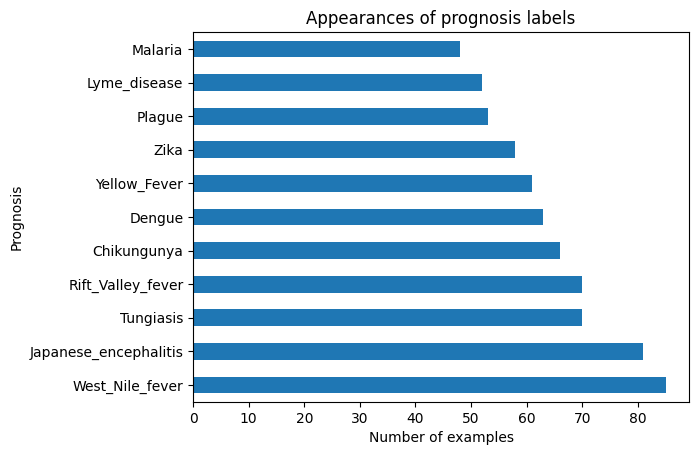

In [11]:
train.prognosis.value_counts().plot.barh()
plt.xlabel('Number of examples')
plt.ylabel('Prognosis')
plt.title('Appearances of prognosis labels')
plt.show()

In [12]:
print(sample_submission.head(3))
del sample_submission

    id                          prognosis
0  707  Dengue Zika Japanese_encephalitis
1  708  Dengue Zika Japanese_encephalitis
2  709  Dengue Zika Japanese_encephalitis


> <div class="alert alert-block alert-info">
<b>Insight:</b> Each submission file can contain three space seperated labels as a predicted target.</div>

In [13]:
print(*(f"\nFeature: {_}; Unique value: {train[_].nunique()}" for _ in train.columns))


Feature: id; Unique value: 707 
Feature: sudden_fever; Unique value: 2 
Feature: headache; Unique value: 2 
Feature: mouth_bleed; Unique value: 2 
Feature: nose_bleed; Unique value: 2 
Feature: muscle_pain; Unique value: 2 
Feature: joint_pain; Unique value: 2 
Feature: vomiting; Unique value: 2 
Feature: rash; Unique value: 2 
Feature: diarrhea; Unique value: 2 
Feature: hypotension; Unique value: 2 
Feature: pleural_effusion; Unique value: 2 
Feature: ascites; Unique value: 2 
Feature: gastro_bleeding; Unique value: 2 
Feature: swelling; Unique value: 2 
Feature: nausea; Unique value: 2 
Feature: chills; Unique value: 2 
Feature: myalgia; Unique value: 2 
Feature: digestion_trouble; Unique value: 2 
Feature: fatigue; Unique value: 2 
Feature: skin_lesions; Unique value: 2 
Feature: stomach_pain; Unique value: 2 
Feature: orbital_pain; Unique value: 2 
Feature: neck_pain; Unique value: 2 
Feature: weakness; Unique value: 2 
Feature: back_pain; Unique value: 2 
Feature: weight_loss; U

> <div class="alert alert-block alert-info">
<b>Insight:</b> Dealing with features that are binary in nature. Probably answers were taken in a Yes / No fashion.</div>

In [14]:
Xo, y = train.iloc[:,1:-1], train.iloc[:,-1]

In [15]:
X_test = test.iloc[:, 1:]

#### Estimating dependency of presented features using mutual information

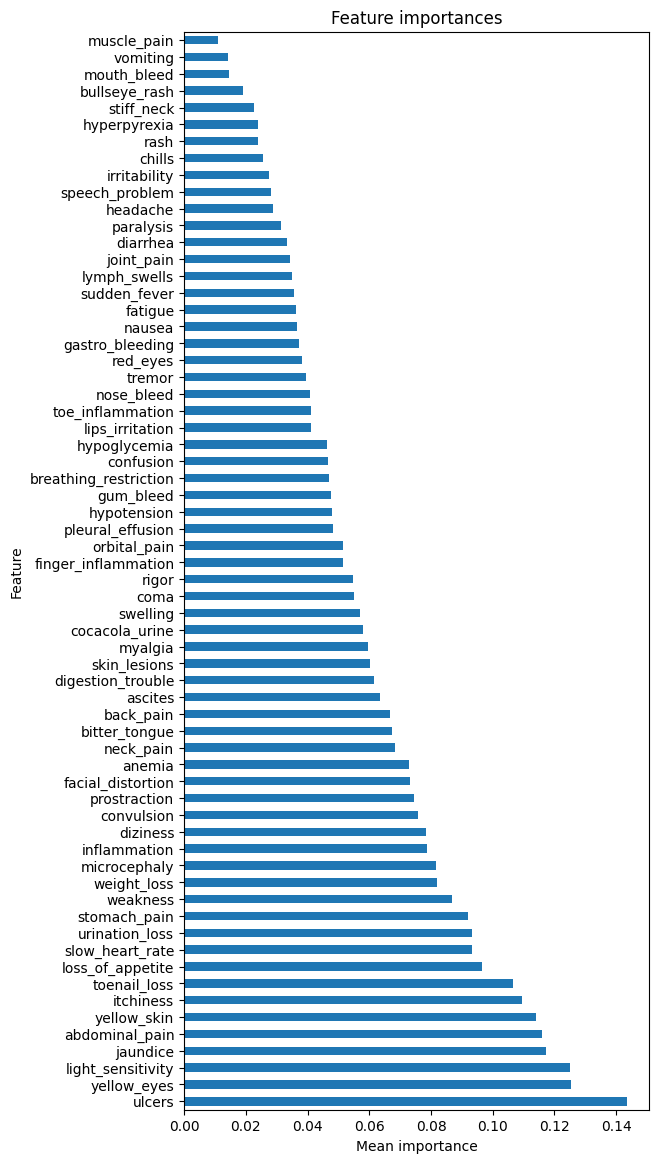

In [16]:
from sklearn.feature_selection import mutual_info_classif

n_iterations=7
importances=np.zeros((n_iterations, Xo.shape[1]))

for i in range(n_iterations):
    importances[i,:] = mutual_info_classif(Xo, y)

feat_importances = pd.Series(np.mean(importances, axis=0), index=Xo.columns).sort_values(ascending=False)

plt.figure(figsize=(6, 14))
feat_importances.plot(kind='barh')

plt.title("Feature importances")
plt.xlabel("Mean importance")
plt.ylabel("Feature")
plt.show()

#### Top feature selection

In [17]:
top_25_features, top_35_features, top_45_features = (
    feat_importances.index[:25].tolist(),
    feat_importances.index[:35].tolist(),
    feat_importances.index[:45].tolist())

#### Cross Validation

In [18]:
# cross-validation
from sklearn import model_selection
n_splits=3
skf = model_selection.StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=rs)

for train_idx, test_idx in skf.split(Xo, y):
    print(f'Train: {len(train_idx)}; Test:{len(test_idx)}')

Train: 471; Test:236
Train: 471; Test:236
Train: 472; Test:235


#### Let us pick a baseline model to see if avg. cross validation with different top features improves our score or not

All; Mean: 0.21428676954427275
Top 25; Mean: 0.24547961678555344
Top 35; Mean: 0.22677473837783357
Top 45; Mean: 0.254202514812581


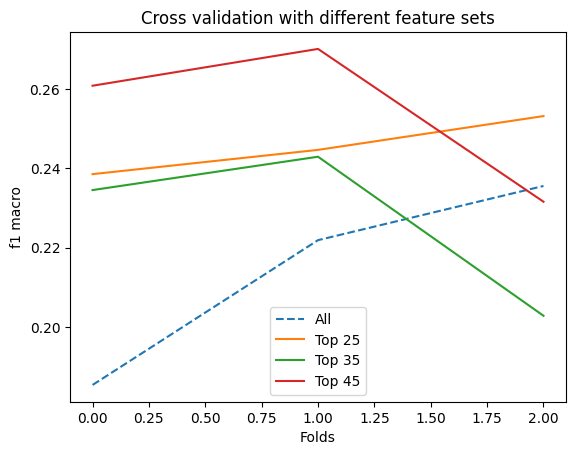

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

feature_sets = {
    "All": Xo,
    "Top 25": Xo[top_25_features],
    "Top 35": Xo[top_35_features],
    "Top 45": Xo[top_45_features]
}
scores = {}
for name, features in feature_sets.items():
    scores[name] = model_selection.cross_val_score(DecisionTreeClassifier(random_state=rs), features, y, cv=skf, scoring="f1_macro")

for key, sc in scores.items():
    mean = sc.mean()
    print(f"{key}; Mean: {mean}")

plt.title("Cross validation with different feature sets")
plt.xlabel("Folds")
plt.ylabel("f1 macro")
for name, score in scores.items():
    if name=='All':
        plt.plot(score, label=name, linestyle='dashed')
    else:
        plt.plot(score, label=name)
plt.legend()
plt.show()

> <div class="alert alert-block alert-info">
<b>Insight:</b> Almost everytime, FS seems to generate a more conservative model. It seems a set of top 45 features would be a sweet spot.</div>

In [20]:
X, y = Xo[top_45_features], y

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#### Let's start with a Random Forest baseline

In [22]:
import optuna
from sklearn.ensemble import RandomForestClassifier
study_name="RF-1/SKF3"
n_trials=15

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 3, 6),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 5)
    }
    model = RandomForestClassifier(**params)
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred, average='macro'))

    mean_f1 = np.mean(f1_scores)
    return mean_f1

study = optuna.create_study(study_name=study_name, direction='maximize')
study.optimize(objective, n_trials=n_trials)

print(f"Best trial for RF1: {study.best_trial.params}")
print(f"Best F1 (Macro) score for RF1: {study.best_value}")
best_params_rf1 = study.best_trial.params

[I 2023-04-20 00:08:21,358] A new study created in memory with name: RF-1/SKF3
[I 2023-04-20 00:08:32,964] Trial 0 finished with value: 0.2963495750756124 and parameters: {'n_estimators': 900, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.2963495750756124.
[I 2023-04-20 00:08:34,491] Trial 1 finished with value: 0.28488695011006654 and parameters: {'n_estimators': 200, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.2963495750756124.
[I 2023-04-20 00:08:40,776] Trial 2 finished with value: 0.2950119285064299 and parameters: {'n_estimators': 900, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.2963495750756124.
[I 2023-04-20 00:08:45,618] Trial 3 finished with value: 0.2871608365705706 and parameters: {'n_estimators': 700, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.2963495750756124.
[I 2023-04-20

Best trial for RF1: {'n_estimators': 400, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 2}
Best F1 (Macro) score for RF1: 0.2987311388221389


In [23]:
import optuna
from lightgbm import LGBMClassifier
study_name="LGBMC-1/SKF3"
n_trials=15
num_classes=11

def objective(trial):
    params = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 2, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 0.9),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 0.9),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 4, 8),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 4),
        'num_class': num_classes,
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 100),
        'verbosity': -1
    }
    model = LGBMClassifier(**params)
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred, average='macro'))

    mean_f1 = np.mean(f1_scores)
    return mean_f1

study = optuna.create_study(study_name=study_name, direction='maximize')
study.optimize(objective, n_trials=n_trials)

print(f"Best trial for LGBMC1: {study.best_trial.params}")
print(f"Best F1 (Macro) score for LGBMC1: {study.best_value}")
best_params_lgbmc1 = study.best_trial.params

[I 2023-04-20 00:09:25,745] A new study created in memory with name: LGBMC-1/SKF3


[LightGBM] [Warning] feature_fraction is set=0.5612975141808875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5612975141808875
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=4 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.5648409132029552, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5648409132029552
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5612975141808875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5612975141808875
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=4 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.5648409132029552, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5648409132029552
[LightGBM] [Warning] bagging_freq is set=3, subsampl

[I 2023-04-20 00:09:34,158] Trial 0 finished with value: 0.29241319168481805 and parameters: {'num_leaves': 92, 'learning_rate': 0.0937166594659805, 'feature_fraction': 0.5612975141808875, 'bagging_fraction': 0.5648409132029552, 'bagging_freq': 3, 'min_child_samples': 4, 'min_data_in_leaf': 1, 'scale_pos_weight': 72.89564914939949}. Best is trial 0 with value: 0.29241319168481805.


[LightGBM] [Warning] feature_fraction is set=0.4162567723029652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4162567723029652
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_fraction is set=0.8336179899291302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8336179899291302
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.4162567723029652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4162567723029652
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_fraction is set=0.8336179899291302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8336179899291302
[LightGBM] [Warning] bagging_freq is set=10, subsa

[I 2023-04-20 00:09:40,183] Trial 1 finished with value: 0.299866534275993 and parameters: {'num_leaves': 39, 'learning_rate': 0.07044406722758786, 'feature_fraction': 0.4162567723029652, 'bagging_fraction': 0.8336179899291302, 'bagging_freq': 10, 'min_child_samples': 7, 'min_data_in_leaf': 3, 'scale_pos_weight': 16.511290188745136}. Best is trial 1 with value: 0.299866534275993.


[LightGBM] [Warning] feature_fraction is set=0.16074622873828642, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16074622873828642
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.7913546143778596, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7913546143778596
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.16074622873828642, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16074622873828642
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.7913546143778596, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7913546143778596
[LightGBM] [Warning] bagging_freq is set=7, subs

[I 2023-04-20 00:09:45,918] Trial 2 finished with value: 0.2986490821374958 and parameters: {'num_leaves': 53, 'learning_rate': 0.06910006721145309, 'feature_fraction': 0.16074622873828642, 'bagging_fraction': 0.7913546143778596, 'bagging_freq': 7, 'min_child_samples': 7, 'min_data_in_leaf': 1, 'scale_pos_weight': 94.19219432197171}. Best is trial 1 with value: 0.299866534275993.


[LightGBM] [Warning] feature_fraction is set=0.5441249067209718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5441249067209718
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.5674274403619347, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5674274403619347
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.5441249067209718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5441249067209718
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.5674274403619347, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5674274403619347
[LightGBM] [Warning] bagging_freq is set=10, subsa

[I 2023-04-20 00:09:48,034] Trial 3 finished with value: 0.2982905273905084 and parameters: {'num_leaves': 12, 'learning_rate': 0.038084214259114034, 'feature_fraction': 0.5441249067209718, 'bagging_fraction': 0.5674274403619347, 'bagging_freq': 10, 'min_child_samples': 8, 'min_data_in_leaf': 1, 'scale_pos_weight': 15.096769531269588}. Best is trial 1 with value: 0.299866534275993.


[LightGBM] [Warning] feature_fraction is set=0.5700752947883679, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5700752947883679
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=4 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.49868680371940954, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49868680371940954
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5700752947883679, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5700752947883679
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=4 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.49868680371940954, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49868680371940954
[LightGBM] [Warning] bagging_freq is set=5, subs

[I 2023-04-20 00:09:56,657] Trial 4 finished with value: 0.2816143118679511 and parameters: {'num_leaves': 76, 'learning_rate': 0.021230797533735635, 'feature_fraction': 0.5700752947883679, 'bagging_fraction': 0.49868680371940954, 'bagging_freq': 5, 'min_child_samples': 4, 'min_data_in_leaf': 1, 'scale_pos_weight': 81.9972569423627}. Best is trial 1 with value: 0.299866534275993.


[LightGBM] [Warning] feature_fraction is set=0.19474827600534672, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.19474827600534672
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.17364766206059085, subsample=1.0 will be ignored. Current value: bagging_fraction=0.17364766206059085
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.19474827600534672, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.19474827600534672
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.17364766206059085, subsample=1.0 will be ignored. Current value: bagging_fraction=0.17364766206059085
[LightGBM] [Warning] bagging_freq is set=3, 

[I 2023-04-20 00:09:58,657] Trial 5 finished with value: 0.26346220180724306 and parameters: {'num_leaves': 13, 'learning_rate': 0.07370759501557723, 'feature_fraction': 0.19474827600534672, 'bagging_fraction': 0.17364766206059085, 'bagging_freq': 3, 'min_child_samples': 8, 'min_data_in_leaf': 2, 'scale_pos_weight': 43.09600975729518}. Best is trial 1 with value: 0.299866534275993.


[LightGBM] [Warning] feature_fraction is set=0.4527404478886513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4527404478886513
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_fraction is set=0.42040242168064645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42040242168064645
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.4527404478886513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4527404478886513
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_fraction is set=0.42040242168064645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42040242168064645
[LightGBM] [Warning] bagging_freq is set=9, subs

[I 2023-04-20 00:10:04,048] Trial 6 finished with value: 0.3011840763434645 and parameters: {'num_leaves': 50, 'learning_rate': 0.07703413418256351, 'feature_fraction': 0.4527404478886513, 'bagging_fraction': 0.42040242168064645, 'bagging_freq': 9, 'min_child_samples': 6, 'min_data_in_leaf': 3, 'scale_pos_weight': 63.6940667330838}. Best is trial 6 with value: 0.3011840763434645.


[LightGBM] [Warning] feature_fraction is set=0.8606691295850734, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8606691295850734
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.5489484589151997, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5489484589151997
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8606691295850734, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8606691295850734
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.5489484589151997, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5489484589151997
[LightGBM] [Warning] bagging_freq is set=2, subsampl

[I 2023-04-20 00:10:12,246] Trial 7 finished with value: 0.2765950161050021 and parameters: {'num_leaves': 91, 'learning_rate': 0.08219269901292947, 'feature_fraction': 0.8606691295850734, 'bagging_fraction': 0.5489484589151997, 'bagging_freq': 2, 'min_child_samples': 5, 'min_data_in_leaf': 1, 'scale_pos_weight': 5.1845546646817855}. Best is trial 6 with value: 0.3011840763434645.


[LightGBM] [Warning] feature_fraction is set=0.8542692487467275, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8542692487467275
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.5102401239344218, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5102401239344218
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8542692487467275, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8542692487467275
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.5102401239344218, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5102401239344218
[LightGBM] [Warning] bagging_freq is set=7, subsampl

[I 2023-04-20 00:10:13,540] Trial 8 finished with value: 0.27767574827339775 and parameters: {'num_leaves': 8, 'learning_rate': 0.045096722001910707, 'feature_fraction': 0.8542692487467275, 'bagging_fraction': 0.5102401239344218, 'bagging_freq': 7, 'min_child_samples': 7, 'min_data_in_leaf': 2, 'scale_pos_weight': 3.8770596771144747}. Best is trial 6 with value: 0.3011840763434645.


[LightGBM] [Warning] feature_fraction is set=0.6422047957462936, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6422047957462936
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=4 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.756555080067668, subsample=1.0 will be ignored. Current value: bagging_fraction=0.756555080067668
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6422047957462936, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6422047957462936
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=4 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.756555080067668, subsample=1.0 will be ignored. Current value: bagging_fraction=0.756555080067668
[LightGBM] [Warning] bagging_freq is set=5, subsample_fr

[I 2023-04-20 00:10:16,329] Trial 9 finished with value: 0.3039141547470343 and parameters: {'num_leaves': 23, 'learning_rate': 0.014985127768966346, 'feature_fraction': 0.6422047957462936, 'bagging_fraction': 0.756555080067668, 'bagging_freq': 5, 'min_child_samples': 4, 'min_data_in_leaf': 2, 'scale_pos_weight': 17.075145771305547}. Best is trial 9 with value: 0.3039141547470343.


[LightGBM] [Warning] feature_fraction is set=0.7143443147754747, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7143443147754747
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.8839622528679766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8839622528679766
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7143443147754747, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7143443147754747
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.8839622528679766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8839622528679766
[LightGBM] [Warning] bagging_freq is set=5, subsampl

[I 2023-04-20 00:10:20,137] Trial 10 finished with value: 0.2721440708172937 and parameters: {'num_leaves': 31, 'learning_rate': 0.002233545494277664, 'feature_fraction': 0.7143443147754747, 'bagging_fraction': 0.8839622528679766, 'bagging_freq': 5, 'min_child_samples': 5, 'min_data_in_leaf': 4, 'scale_pos_weight': 39.35456611298128}. Best is trial 9 with value: 0.3039141547470343.


[LightGBM] [Warning] feature_fraction is set=0.394701374945433, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.394701374945433
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_fraction is set=0.28439413724329093, subsample=1.0 will be ignored. Current value: bagging_fraction=0.28439413724329093
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.394701374945433, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.394701374945433
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_fraction is set=0.28439413724329093, subsample=1.0 will be ignored. Current value: bagging_fraction=0.28439413724329093
[LightGBM] [Warning] bagging_freq is set=8, subsampl

[I 2023-04-20 00:10:24,580] Trial 11 finished with value: 0.3028484781576542 and parameters: {'num_leaves': 61, 'learning_rate': 0.055206930247602023, 'feature_fraction': 0.394701374945433, 'bagging_fraction': 0.28439413724329093, 'bagging_freq': 8, 'min_child_samples': 5, 'min_data_in_leaf': 3, 'scale_pos_weight': 60.888815312760855}. Best is trial 9 with value: 0.3039141547470343.


[LightGBM] [Warning] feature_fraction is set=0.32084665035844995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32084665035844995
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.2204459998740475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2204459998740475
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.32084665035844995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32084665035844995
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.2204459998740475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2204459998740475
[LightGBM] [Warning] bagging_freq is set=7, subs

[I 2023-04-20 00:10:28,226] Trial 12 finished with value: 0.2728353008050702 and parameters: {'num_leaves': 67, 'learning_rate': 0.05403320528267733, 'feature_fraction': 0.32084665035844995, 'bagging_fraction': 0.2204459998740475, 'bagging_freq': 7, 'min_child_samples': 5, 'min_data_in_leaf': 4, 'scale_pos_weight': 57.41624876251204}. Best is trial 9 with value: 0.3039141547470343.


[LightGBM] [Warning] feature_fraction is set=0.3031641563877244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3031641563877244
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=4 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_fraction is set=0.6879169621151067, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6879169621151067
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.3031641563877244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3031641563877244
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=4 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_fraction is set=0.6879169621151067, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6879169621151067
[LightGBM] [Warning] bagging_freq is set=8, subsampl

[I 2023-04-20 00:10:31,830] Trial 13 finished with value: 0.2883147045076133 and parameters: {'num_leaves': 26, 'learning_rate': 0.02540527582036694, 'feature_fraction': 0.3031641563877244, 'bagging_fraction': 0.6879169621151067, 'bagging_freq': 8, 'min_child_samples': 4, 'min_data_in_leaf': 3, 'scale_pos_weight': 32.702269076645614}. Best is trial 9 with value: 0.3039141547470343.


[LightGBM] [Warning] feature_fraction is set=0.6445055543492114, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6445055543492114
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.3164735617840822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3164735617840822
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6445055543492114, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6445055543492114
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.3164735617840822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3164735617840822
[LightGBM] [Warning] bagging_freq is set=5, subsampl

[I 2023-04-20 00:10:37,157] Trial 14 finished with value: 0.27943655442751875 and parameters: {'num_leaves': 60, 'learning_rate': 0.0574334525986125, 'feature_fraction': 0.6445055543492114, 'bagging_fraction': 0.3164735617840822, 'bagging_freq': 5, 'min_child_samples': 5, 'min_data_in_leaf': 2, 'scale_pos_weight': 51.82799068375111}. Best is trial 9 with value: 0.3039141547470343.


Best trial for LGBMC1: {'num_leaves': 23, 'learning_rate': 0.014985127768966346, 'feature_fraction': 0.6422047957462936, 'bagging_fraction': 0.756555080067668, 'bagging_freq': 5, 'min_child_samples': 4, 'min_data_in_leaf': 2, 'scale_pos_weight': 17.075145771305547}
Best F1 (Macro) score for LGBMC1: 0.3039141547470343


In [24]:
import optuna
from xgboost import XGBClassifier

study_name = "XGBC-1/SKF3"
n_trials = 15

def objective(trial):
    params = {
        'objective': 'multi:softmax',
        'max_depth': trial.suggest_int('max_depth', 5, 16),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.44),
        'subsample': trial.suggest_float('subsample', 0.1, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.9),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 6),
        'gamma': trial.suggest_float('gamma', 0.1, 8),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 8),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 8),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 100),
        'verbosity': 0
    }
    model = XGBClassifier(**params)
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred, average='macro'))

    mean_f1 = np.mean(f1_scores)
    return mean_f1

study = optuna.create_study(study_name=study_name, direction='maximize')
study.optimize(objective, n_trials=n_trials)

print(f"Best trial for XGBC1: {study.best_trial.params}")
print(f"Best F1 (Macro) score for XGBC1: {study.best_value}")
best_params_xgbc1 = study.best_trial.params

[I 2023-04-20 00:10:37,264] A new study created in memory with name: XGBC-1/SKF3
[I 2023-04-20 00:10:38,174] Trial 0 finished with value: 0.09709372720211283 and parameters: {'max_depth': 15, 'learning_rate': 0.36210752625405357, 'subsample': 0.3323762004446358, 'colsample_bytree': 0.13458305036800536, 'min_child_weight': 4, 'gamma': 5.216730299023716, 'reg_alpha': 5.0654044991581095, 'reg_lambda': 1.028915466508429, 'scale_pos_weight': 71.04777826646243}. Best is trial 0 with value: 0.09709372720211283.
[I 2023-04-20 00:10:39,484] Trial 1 finished with value: 0.16005213624710238 and parameters: {'max_depth': 14, 'learning_rate': 0.17187126346640574, 'subsample': 0.84258109634645, 'colsample_bytree': 0.13976962531862933, 'min_child_weight': 2, 'gamma': 4.727436058468467, 'reg_alpha': 2.385495796889367, 'reg_lambda': 1.6134566485431068, 'scale_pos_weight': 32.228345120045006}. Best is trial 1 with value: 0.16005213624710238.
[I 2023-04-20 00:10:41,052] Trial 2 finished with value: 0.255

Best trial for XGBC1: {'max_depth': 8, 'learning_rate': 0.2969073826177302, 'subsample': 0.522988431712163, 'colsample_bytree': 0.6003857891146491, 'min_child_weight': 2, 'gamma': 1.538181741510988, 'reg_alpha': 0.512906649848512, 'reg_lambda': 0.09132966238385448, 'scale_pos_weight': 2.4763754967349993}
Best F1 (Macro) score for XGBC1: 0.30252737032724397


In [25]:
# training the models with the best hyperparameters on the full dataset

rf = RandomForestClassifier(**best_params_rf1).fit(X, y)
lgbmc = LGBMClassifier(**best_params_lgbmc1).fit(X, y)
xgbc = XGBClassifier(**best_params_xgbc1).fit(X, y)

preds_1 = rf.predict(X_test[top_45_features])
preds_2 = lgbmc.predict(X_test[top_45_features])
preds_3 = xgbc.predict(X_test[top_45_features])

preds_1 = label_encoder.inverse_transform(preds_1)
preds_2 = label_encoder.inverse_transform(preds_2)
preds_3 = label_encoder.inverse_transform(preds_3)

[LightGBM] [Warning] feature_fraction is set=0.6422047957462936, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6422047957462936
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=4 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.756555080067668, subsample=1.0 will be ignored. Current value: bagging_fraction=0.756555080067668
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[00:11:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.



In [27]:
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier(**best_params_rf1).fit(X, y)
lgbmc = LGBMClassifier(**best_params_lgbmc1).fit(X, y)
xgbc = XGBClassifier(**best_params_xgbc1).fit(X, y)

ensemble_model = VotingClassifier(estimators=[('rf', rf), ('lgbmc', lgbmc), ('xgbc', xgbc)])
ensemble_model.fit(X, y)
preds_4 = ensemble_model.predict(X_test[top_45_features])
preds_4 = label_encoder.inverse_transform(preds_4)

[00:11:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[00:11:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.



In [28]:
preds = []
for a1, a2, a3 in zip(preds_1, preds_2, preds_4):
    preds.append(' '.join([a3, a1, a2]))

In [29]:
# kaggle submission file
submission = pd.DataFrame({'id': test.id, 'prognosis': preds})
submission.to_csv('submission_3.csv', index=False)